In [26]:
%reload_ext autoreload
%autoreload 2

In [27]:
import os
import sys
import glob
import json
import datetime
import nltk
nltk.download('stopwords')
nltk.download('stopwords')
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /home/habte/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /home/habte/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('punkt')
# Add parent directory to path to import modules from src
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

from src.loader import SlackDataLoader
import src.utils as utils

[nltk_data] Downloading package stopwords to /home/habte/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/habte/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
# Initialize DataLoader
#sl = SlackDataLoader('/home/habte/Desktop/Anonymized_B6SlackExport_25Nov23/anonymized/')
sl = SlackDataLoader('/home/habte/Desktop/Anonymized_B6SlackExport_25Nov23/anonymized/')

In [30]:
df = sl.slack_parser('/home/habte/Desktop/Anonymized_B6SlackExport_25Nov23/anonymized')
#print(df.shape)
df.head()

{'client_msg_id': 'a6699b4e-687c-4a22-a007-99594d6bb13a', 'type': 'message', 'text': '<https://youtu.be/zoKn4qk4mac>', 'user': 'U03UJH1EQQL', 'ts': '1665837934.076499', 'blocks': [{'type': 'rich_text', 'block_id': '7M06R', 'elements': [{'type': 'rich_text_section', 'elements': [{'type': 'link', 'url': 'https://youtu.be/zoKn4qk4mac'}]}]}], 'team': 'T03U4J8HMUG', 'user_team': 'T03U4J8HMUG', 'source_team': 'T03U4J8HMUG', 'user_profile': {'avatar_hash': '81b299d9869c', 'image_72': 'https://avatars.slack-edge.com/2022-08-20/3953555815671_81b299d9869ca44e70c1_72.png', 'first_name': 'Kelly', 'real_name': 'Kelly Soto', 'display_name': 'Kelly Soto', 'team': 'T03U4J8HMUG', 'name': 'Kelly', 'is_restricted': False, 'is_ultra_restricted': False}, 'attachments': [{'from_url': 'https://youtu.be/zoKn4qk4mac', 'thumb_url': 'https://i.ytimg.com/vi/zoKn4qk4mac/hqdefault.jpg', 'thumb_width': 480, 'thumb_height': 360, 'video_html': '<iframe width="400" height="225" src="https://www.youtube.com/embed/zoKn4q

{'type': 'message', 'subtype': 'channel_join', 'ts': '1662921909.194839', 'user': 'U03TEPYRM2P', 'text': '<@U03TEPYRM2P> has joined the channel'}
{'type': 'message', 'subtype': 'channel_join', 'ts': '1662921964.572239', 'user': 'U03UD63A8PP', 'text': '<@U03UD63A8PP> has joined the channel', 'inviter': 'U03TEPYRM2P'}
{'type': 'message', 'subtype': 'channel_join', 'ts': '1662921964.649279', 'user': 'U03UUMM7Y8H', 'text': '<@U03UUMM7Y8H> has joined the channel', 'inviter': 'U03TEPYRM2P'}
{'type': 'message', 'subtype': 'channel_join', 'ts': '1662921964.706479', 'user': 'U03UD68RQH3', 'text': '<@U03UD68RQH3> has joined the channel', 'inviter': 'U03TEPYRM2P'}
{'type': 'message', 'subtype': 'channel_join', 'ts': '1662921964.769919', 'user': 'U03V6HMRPGQ', 'text': '<@U03V6HMRPGQ> has joined the channel', 'inviter': 'U03TEPYRM2P'}
{'type': 'message', 'subtype': 'channel_join', 'ts': '1662921964.824299', 'user': 'U03UJN29Y4C', 'text': '<@U03UJN29Y4C> has joined the channel', 'inviter': 'U03TEPYR

msg_type                                        msg_content   sender_name  \
0  message                     <https://youtu.be/zoKn4qk4mac>    Kelly Soto   
1  message  Good morning everyone :blush: welcome to week ...  Garrett Bell   
2  message                                      Good morning!  Carlos Gross   
3  message                                      Good Morning.   Samuel King   
4  message                                    Good Morning!!!  Daniel Brown   

       msg_sent_time msg_dist_type time_thread_start  reply_count  \
0  1665837934.076499          link                 0            0   
1  1665385707.569729          text                 0            0   
2  1665385734.616309          text                 0            0   
3  1665385760.620169          text                 0            0   
4  1665387214.795849          text                 0            0   

   reply_users_count reply_users tm_thread_end     channel  
0                  0           0             0  anonymized  
1                  0           0             0  anonymized  
2                  0           0             0  anonymized  
3                  0           0             0  anonymized  
4                  0           0             0  anonymized

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   msg_type           3342 non-null   object
 1   msg_content        3342 non-null   object
 2   sender_name        3342 non-null   object
 3   msg_sent_time      3342 non-null   object
 4   msg_dist_type      3342 non-null   object
 5   time_thread_start  3342 non-null   object
 6   reply_count        3342 non-null   int64 
 7   reply_users_count  3342 non-null   int64 
 8   reply_users        3342 non-null   object
 9   tm_thread_end      3342 non-null   object
 10  channel            3342 non-null   object
dtypes: int64(2), object(9)
memory usage: 287.3+ KB


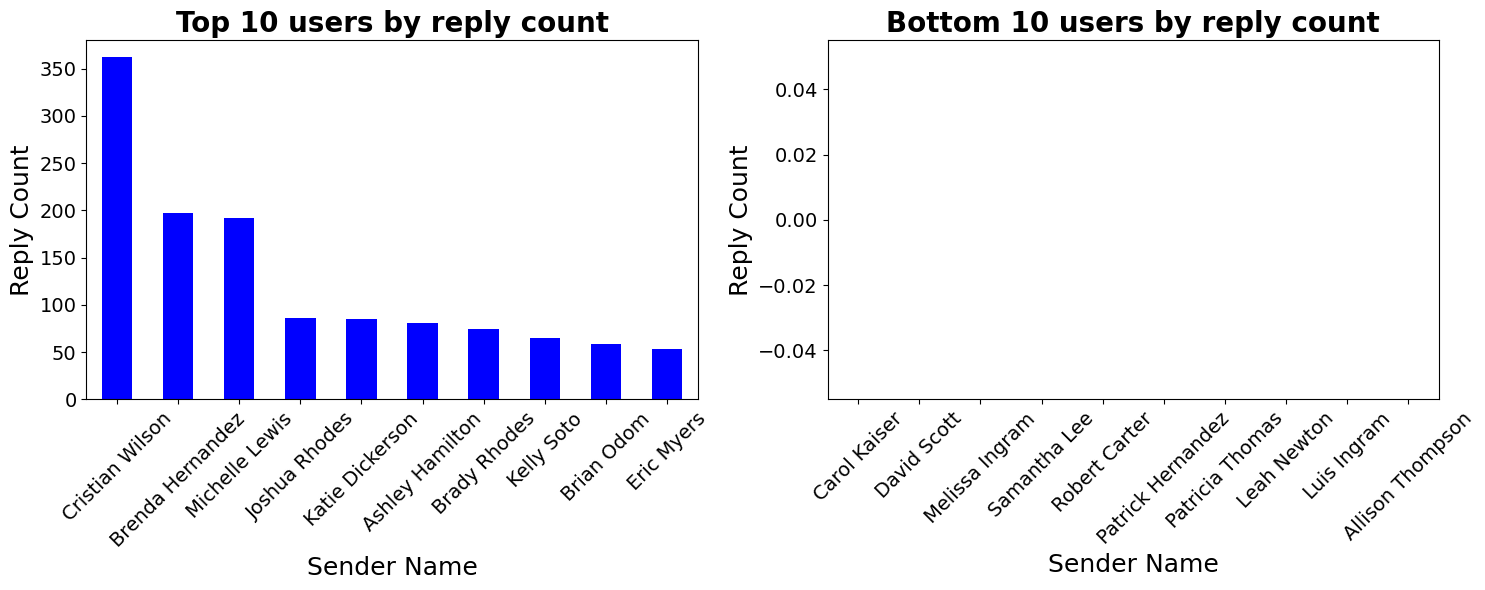

In [41]:
grouped_data = df.groupby('sender_name')['reply_count'].sum()
top_10_users = grouped_data.sort_values(ascending=False)[:10]
bottom_10_users = grouped_data.sort_values(ascending=False)[-10:]

# Plotting the top 10 users
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
top_10_users.plot(kind='bar', color='blue')
plt.title('Top 10 users by reply count', size=20, fontweight='bold')
plt.xlabel("Sender Name", size=18)
plt.ylabel("Reply Count", size=18)
plt.xticks(rotation=45, size=14)
plt.yticks(size=14)
# Plotting the bottom 10 users
plt.subplot(1, 2, 2)
bottom_10_users.plot(kind='bar', color='red')
plt.title('Bottom 10 users by reply count', size=20, fontweight='bold')
plt.xlabel("Sender Name", size=18)
plt.ylabel("Reply Count", size=18)
plt.xticks(rotation=45, size=14)
plt.yticks(size=14)

plt.tight_layout()
plt.show()


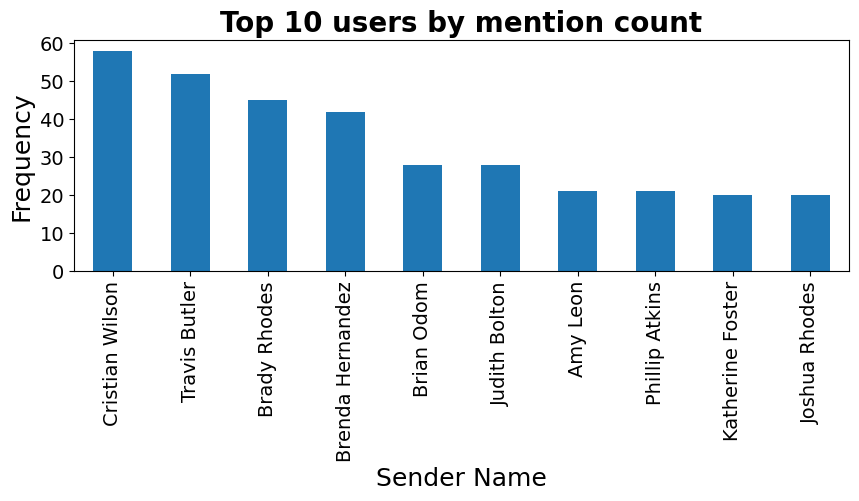

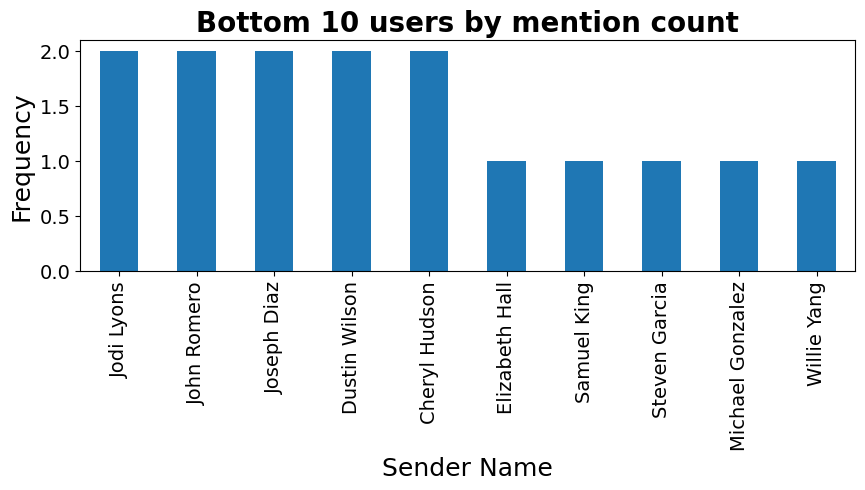

In [42]:
# Top 10 users by mention count
mention_counts = df[df['msg_content'].str.contains('@U\w+')]
mention_counts.groupby('sender_name')['msg_content'].count().sort_values(ascending=False)[:10]\
    .plot(kind='bar', figsize=(10, 3))
plt.title('Top 10 users by mention count', size=20, fontweight='bold')
plt.xlabel("Sender Name", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

# Bottom 10 users by mention count
mention_counts.groupby('sender_name')['msg_content'].count().sort_values(ascending=False)[-10:]\
    .plot(kind='bar', figsize=(10, 3))
plt.title('Bottom 10 users by mention count', size=20, fontweight='bold')
plt.xlabel("Sender Name", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()


In [37]:
#for the top 10 messages by replies
top = df.groupby('msg_content')['reply_count'].sum().sort_values(ascending = False)[:10]
print('The top 10 messages by reply count are\n{}\n'.format(top))
#for bottom 10 messages by reply coount
bott = df.groupby('msg_content')['reply_count'].sum().sort_values(ascending = False)[-10:]
print('The bottom 10 messages by reply count are\n{}\n'.format(bott))

The top 10 messages by reply count are
msg_content
1. How do I find my jupyter notebook file in my instance(using the terminal)?  \n2. How do I find folders I've created in my remote machine inside jupyter notebook web-interface?\n<@U03UKL27B0R> <@U03V8LHPDME>                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [38]:
#top and bottom 10 messages by mentions are
mention_count = df['msg_content'].str.count(r'@\w+')
df['mention_count'] = mention_count
top_10_messages = df[['msg_content', 'mention_count']].nlargest(10, 'mention_count')
bot_10_messages = df[['msg_content', 'mention_count']].nsmallest(10, 'mention_count')
print('The top 10 messages by mention count are:\n{}\n'.format(top_10_messages))
print('The bottom 10 messages by mention count are:\n{}\n'.format(bot_10_messages))


The top 10 messages by mention count are:
                                            msg_content  mention_count
1449  So, during our group meeting, there is a quest...              8
616   <@U03UKL27B0R> <@U03UP7V9Q57> <@U03U9DB7REG> <...              4
1063  <@U03UVHCV6KB> <@U03UJGP0C68> <@U03UG4Q7V42> <...              4
2135  <@U03UKL27B0R> <@U03U9DB7REG> <@U03V8LHPDME> <...              4
3276  <@U03UKL27B0R>\n<@U03UP7V9Q57>\n<@U03TX2VN6H5>...              4
105        <@U03UKL27B0R> <@U03U9DB7REG> <@U03V8LHPDME>              3
132   <!channel>\nTher is a section that says\n• Lin...              3
181        <@U03V8LHPDME> <@U03UKL27B0R> <@U03U9DB7REG>              3
208   I used\n```sudo rm /usr/local/bin/docker-compo...              3
302   <@U03V8LHPDME> <@U03U9DB7REG> <@U03UKL27B0R> I...              3

The bottom 10 messages by mention count are:
                                         msg_content  mention_count
0                     <https://youtu.be/zoKn4qk4mac>           

In [ ]:
reply_counts = df.groupby(['channel', 'user'])['reply_count'].sum().unstack().fillna(0)

# Continue with the Seaborn code
import seaborn as sns
top_users_per_channel = reply_counts.apply(lambda x: x.nlargest(10))
top_users_per_channel = top_users_per_channel.stack().reset_index()
top_users_per_channel.columns = ['Channel', 'User', 'Reply Count']
top_users_list = top_users_per_channel['User'].value_counts().nlargest(10).index
top_users_per_channel = top_users_per_channel[top_users_per_channel['User'].isin(top_users_list)]

plt.figure(figsize=(12, 6))
sns.lineplot(x='Channel', y='Reply Count', hue='User', data=top_users_per_channel, marker='o')

plt.title('Top 10 Users\' Reply Count per Channel')
plt.xlabel('Channel')
plt.ylabel('Reply Count')
plt.xticks(rotation=45)
plt.legend(title='Top 10 Users', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/tmp/ipykernel_6674/744302174.py:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['msg_sent_time'] = pd.to_datetime(df['msg_sent_time'], unit='s')


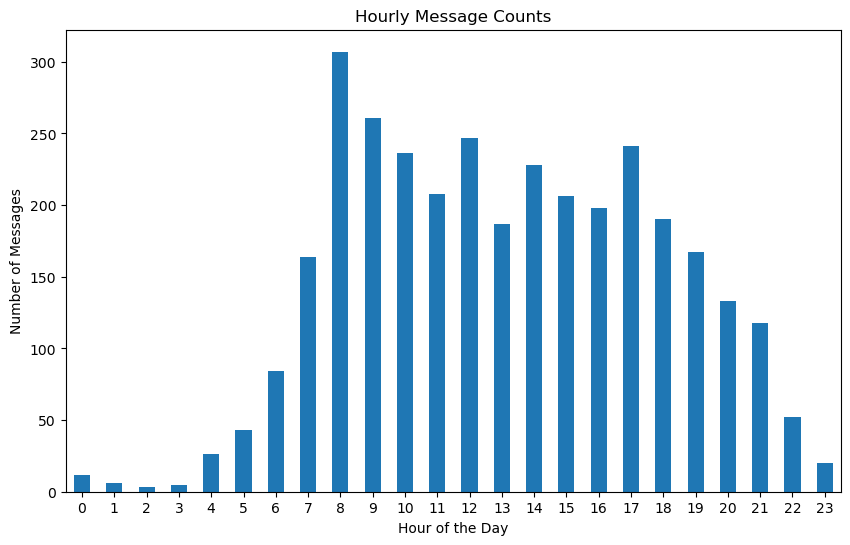

The hour with the most messages is 8:00 with 307 messages.


In [ ]:
# Convert 'msg_sent_time' column to datetime format
df['msg_sent_time'] = pd.to_datetime(df['msg_sent_time'], unit='s')

# Extract hour from message timestamps
df['hour_sent'] = df['msg_sent_time'].dt.hour

# Group messages by hour and count the number of messages in each hour
hourly_message_count = df.groupby('hour_sent').size()

# Find the hour with the maximum number of messages
hour_peak = hourly_message_count.idxmax()
max_messages = hourly_message_count.max()

# Visualize hourly message counts
hourly_message_count.plot(kind='bar', figsize=(10, 6))
plt.title('Hourly Message Counts')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Messages')
plt.xticks(rotation=0)
plt.show()

print(f"The hour with the most messages is {hour_peak}:00 with {max_messages} messages.")

In [ ]:
#which messages were perplied within five minutes
#first convert the time the message was sent and the time the first reply was sent
df['msg_sent_time'] = pd.to_datetime(df['msg_sent_time'], unit='s')
df['time_thread_start'] = pd.to_datetime(df['time_thread_start'], unit='s')

#now we can filterout the messages that dont have replies
replied_msg = df[df['reply_count'] != 0]

# now we can find the time difference between the first message and the first reply
time_difference =  replied_msg['time_thread_start'] - replied_msg['msg_sent_time']

# Filter messages with time difference less than or equal to 5 minutes
messages_within_5_min = replied_msg[time_difference <= pd.Timedelta(minutes=5)]


In [ ]:
#filter messages with time difference less than or equal to 5 minutes
messages_within_5_min = replied_msg[time_difference <= pd.Timedelta(minutes=5)]
#calculate the fraction of messages replied within 5 minutes
fraction_replied_within_5_min = len(messages_within_5_min) / len(df) if len(df) != 0 else 0
print(f"Fraction of messages replied within 5 minutes: {fraction_replied_within_5_min*100}")

Fraction of messages replied within 5 minutes: 9.30809105251296


In [ ]:
messages_within_5_min['hour_sent'] = messages_within_5_min['msg_sent_time'].dt.hour

plt.figure(figsize=(10,8))
plt.scatter(
    (messages_within_5_min['time_thread_start'] - messages_within_5_min['msg_sent_time']).dt.total_seconds() / 60,
    messages_within_5_min['hour_sent'],
    # c=messages_within_5_min['channel_label'],
    cmap='viridis',
    alpha=0.7
)

plt.xlabel('Time difference in mins')
plt.ylabel('time of the day(24hrs)')
plt.title('messages replied within 5 mins')

# plt.colorbar(label='Channel')
plt.grid(True)
plt.show()

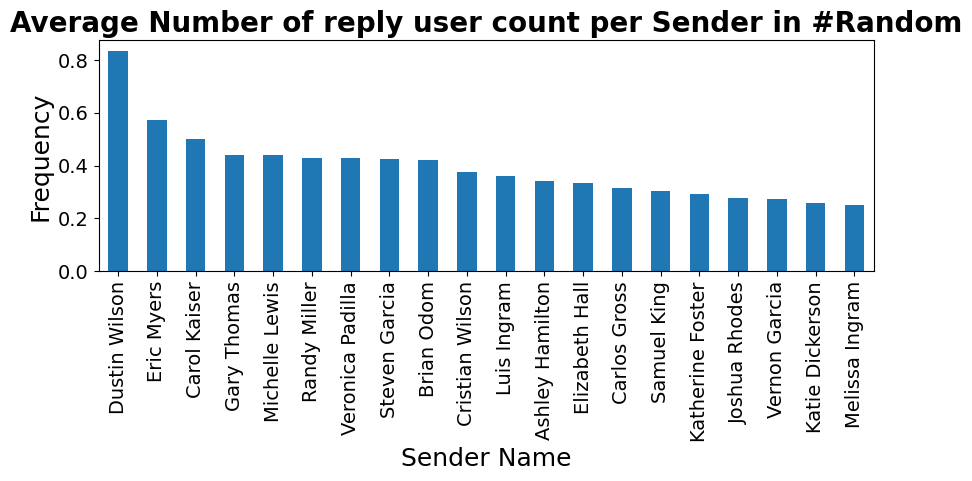

In [ ]:
plotter.draw_avg_reply_users_count(df)

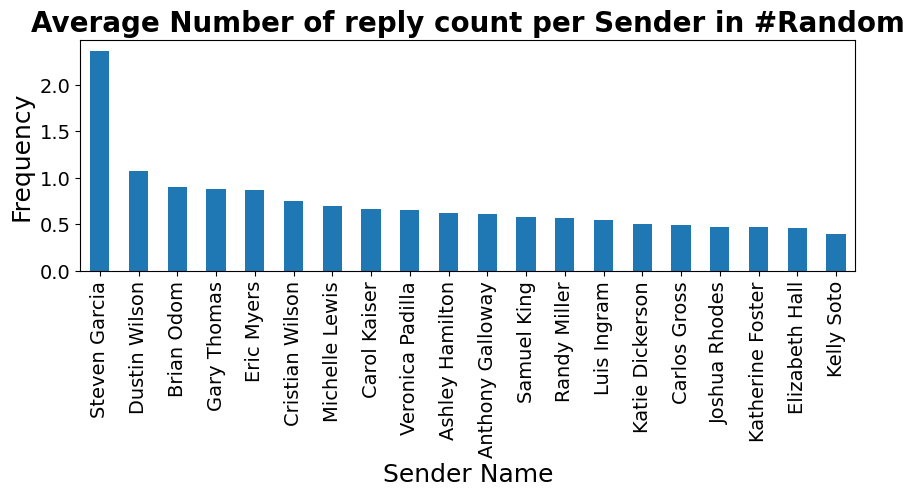

In [ ]:
plotter.draw_avg_reply_count(df)

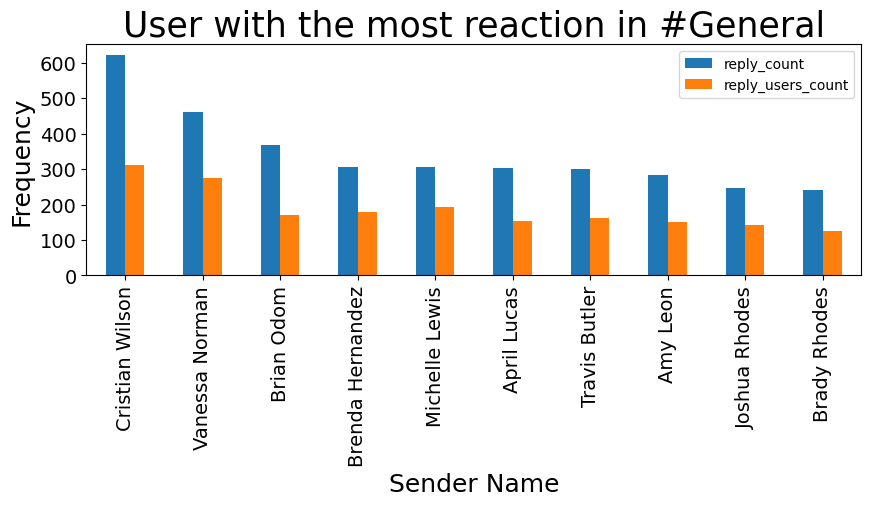

In [ ]:
plotter.draw_user_reaction(df)

## Insight Extraction

Below are some useful questions to answer. Feel free to explore to answer other interesting questions that may be of help to get insight about student's behaviour, need, and future performance 

In [ ]:
X = df['sender_name'].value_counts()[:10]
Y = df['sender_name'].value_counts()[-10:]

print('the top 10 users by message count are: \n{}'.format(X))
print(f'and the users from the bottom 10 are: \n{Y}')

the top 10 users by message count are: 
sender_name
Brenda Hernandez    325
Travis Butler       294
Cristian Wilson     283
Amy Leon            244
Michelle Lewis      171
Brady Rhodes        149
Judith Bolton       145
Joshua Rhodes       141
Brittany Garcia     120
Phillip Atkins      111
Name: count, dtype: int64
and the users from the bottom 10 are: 
sender_name
Patricia Thomas      3
Melissa Ingram       3
Samantha Lee         3
Leah Newton          2
Willie Yang          2
Randy Miller         2
Allison Thompson     1
Patrick Hernandez    1
David Scott          1
Vernon Garcia        1
Name: count, dtype: int64


### Harder questions to look into

In [ ]:
# Based on messages, reactions, references shared, and other relevant data such as classification of questions into techical question, comment, answer, aorder stu the python, statistics, and sql skill level of a user?